## [Chosen Dataset: myanimelist-dataset-animes-profiles-reviews](https://www.kaggle.com/marlesson/myanimelist-dataset-animes-profiles-reviews)
- project data_animes.csv         
- project_data_profiles.csv
- project_data_reviews.csv


In [2]:
# Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import json
%matplotlib inline
!pip install plotly
!pip install wordcloud


In [3]:
df_profile = pd.read_csv('data/project_data_profiles.csv', sep=',')
df_profile.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [4]:
df_anime = pd.read_csv('data/project data_animes.csv', sep=',')
# rename column "uid" to "anime_uid"
df_anime = df_anime.rename(columns={'uid': 'anime_uid'})
df_anime.head()

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [5]:
df_review= pd.read_csv('data/project_data_reviews.csv', sep=',')
df_review.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


---

## Join/merge datasets 

---

In [6]:
anime_review_data=pd.merge(df_anime,df_review,on='anime_uid',suffixes= ['', '_review'])
anime_full_data = pd.merge(anime_review_data, df_profile, on='profile', suffixes=['','_profile'])
anime_full_data.head()

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,uid,profile,text,score_review,scores,link_review,gender,birthday,favorites_anime,link_profile
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
1,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
2,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
4,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn


---
## Creating a dataframe that shows top 10 anime based on score counts
---

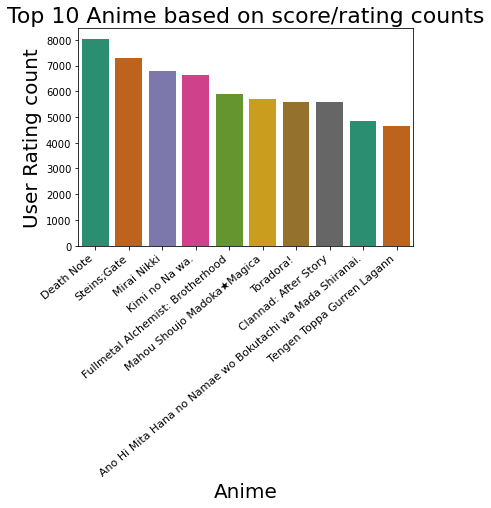

In [7]:

def TopTenBasedOnScore():
 
    combine_anime_rating = anime_full_data.dropna(axis = 0, subset = ['title'])
    anime_ratingCount = (combine_anime_rating.
                        groupby(by=['title'])['score_review'].count().
                        reset_index().rename(columns = {'score':'totalScoreCount'})
                        [['title','score_review']])
    #Plotting the bar plot for top 10 anime as per rating 
    top10_animerating=anime_ratingCount[['title', 'score_review']].sort_values(by = 'score_review',ascending = False).head(10)
    ax=sns.barplot(x="title", y="score_review", data=top10_animerating, palette="Dark2")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
    ax.set_title('Top 10 Anime based on score/rating counts',fontsize = 22)
    ax.set_xlabel('Anime',fontsize = 20) 
    ax.set_ylabel('User Rating count', fontsize = 20)
   
TopTenBasedOnScore()

---
## Creating a dataframe that shows top 10 anime based on Community size
---

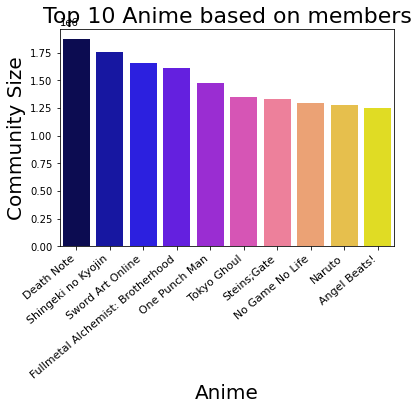

In [8]:

def TopTenBasedOnCommunitySize():
    duplicate_anime=anime_full_data.copy()
    duplicate_anime.drop_duplicates(subset ="title", 
                         keep = 'first', inplace = True)
    #Plotting bar plot               
    top10_animemembers=duplicate_anime[['title', 'members']].sort_values(by = 'members',ascending = False).head(10)
    ax=sns.barplot(x="title", y="members", data=top10_animemembers, palette="gnuplot2")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
    ax.set_title('Top 10 Anime based on members',fontsize = 22)
    ax.set_xlabel('Anime',fontsize = 20) 
    ax.set_ylabel('Community Size', fontsize = 20)
TopTenBasedOnCommunitySize()

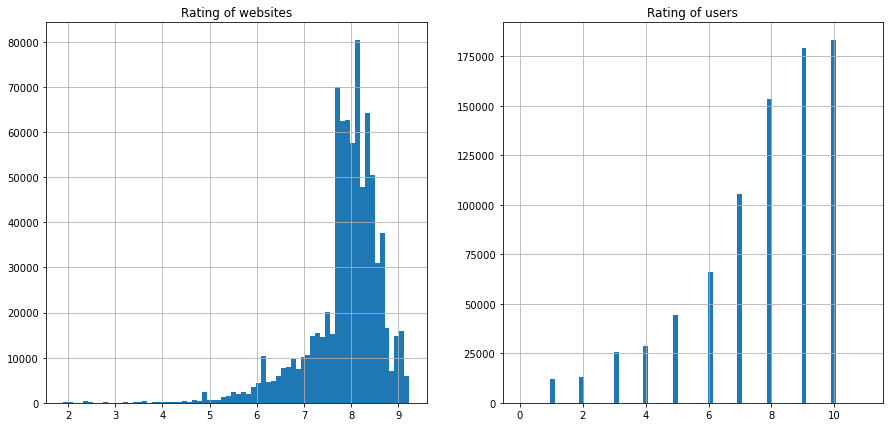

In [9]:
def RatingGraph(): 
    #Distribution of ratings
    plt.figure(figsize = (15, 7))
    plt.subplot(1,2,1)
    anime_full_data['score'].hist(bins=70)
    plt.title("Rating of websites")
    plt.subplot(1,2,2)
    anime_full_data['score_review'].hist(bins=70)
    plt.title("Rating of users")
RatingGraph()

In [10]:
# anime_full_data.isnull().sum()

## Genre Word Cloud

(-0.5, 799.5, 399.5, -0.5)

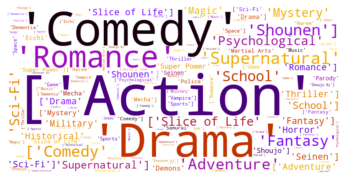

In [11]:
nonull_anime=anime_full_data.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

In [12]:
#Replacing -1 with NaN in user_rating column
anime_feature=anime_full_data.copy()
anime_feature["score_review"].replace({-1: np.nan}, inplace=True)
anime_feature.head()


,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,uid,profile,text,score_review,scores,link_review,gender,birthday,favorites_anime,link_profile
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
1,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
2,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
4,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn


In [13]:
#dropping all the null values as it aids nothing
anime_feature = anime_feature.dropna(axis = 0, how ='any') 
anime_feature.isnull().sum()

anime_uid          0
title              0
synopsis           0
genre              0
aired              0
episodes           0
members            0
popularity         0
ranked             0
score              0
img_url            0
link               0
uid                0
profile            0
text               0
score_review       0
scores             0
link_review        0
gender             0
birthday           0
favorites_anime    0
link_profile       0
dtype: int64

In [14]:
counts = anime_feature['uid'].value_counts()
counts

272861    54
46091     54
322490    54
67847     54
288551    54
          ..
139561     1
182580     1
324215     1
171415     1
236245     1
Name: uid, Length: 73954, dtype: int64

### There are users who has rated only once, even if they have rated it 5, it can’t be considered a valuable record for recommendation, so let's considered minimum 10 ratings by the user as threshold value. 

In [15]:
anime_feature = anime_feature[anime_feature['uid'].isin(counts[counts >= 10].index)]
anime_feature['uid'].value_counts()

322490    54
67847     54
288551    54
46091     54
272861    54
          ..
218126    12
89245     12
304290    12
40101     12
230481    12
Name: uid, Length: 12429, dtype: int64

# pivot table 
pivot table helps create sparse matrix, which can help for cosine similarity.

In [16]:
anime_pivot = anime_full_data.pivot_table(index = 'title', columns = 'uid', values='score_review').fillna(0)
anime_pivot.head()

uid,1,9,10,11,12,13,14,15,16,17,...,325672,325674,325682,325684,325696,325705,325729,325734,325738,325747
title,,,,,,,,,,,,,,,,,,,,,
"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Bungaku Shoujo"" Memoire",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Bungaku Shoujo"" Movie",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Calpis"" Hakkou Monogatari",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

## Another approach to get the anime_pivot if ``pivot_table`` uses too much memory

In [17]:
# testing = anime_full_data.groupby(['title','uid'])['score_review'].max().unstack().fillna(0)
# testing.head()

In [18]:
# print(anime_pivot.shape)
# print(testing.shape)

---

## Recommendation based on Collaborative Filtering

In [22]:
# creating a sparse martix
from scipy.sparse import csr_matrix
anime_matrix = csr_matrix(anime_pivot.values)

# fitting the model. Cosine Similarity using KNN.
from sklearn.neighbors import NearestNeighbors
knnmodel = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knnmodel.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

## Random anime chosen + recommendation function

In [23]:
# get a random anime title and find recommendation for it.
query = np.random.choice(anime_pivot.shape[0])

def print_rec(query):
    distances, indices = knnmodel.kneighbors(anime_pivot.iloc[query,:].values.reshape(1, -1), n_neighbors=5)
    # ^ returning the distances and indices of 6 neighbours through KNN from the randomly chosen index(anime_title) 

    # print(distances, indices)
    for i in range(0, len(distances.flatten())):
        if i==0:
            print('Recommendations for {0}:'.format(anime_pivot.index[query]))
        else:
            print('\t{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
            
print_rec(query)

Recommendations for Noragami Aragoto:
	1: Ore no Imouto ga Konnani Kawaii Wake ga Nai., with distance of 1.0:
	2: Ore no Imouto ga Konnani Kawaii Wake ga Nai. Specials, with distance of 1.0:
	3: Ore no Imouto ga Konnani Kawaii Wake ga Nai: SD Chara ni Yoru Character Commentary, with distance of 1.0:
	4: Ore no Imouto ga Konnani Kawaii Wake ga Nai, with distance of 1.0:


## Makes an array of anime as it's string name, not the anime id

In [24]:
arr = []

for i in range(len(anime_pivot)):
    arr.append(anime_pivot.index[int(i)])
#     print(anime_pivot.index[int(i)])

## User is allowed to enter input (the index) instead of it being randomly chosen.

In [25]:
inp = input ("enter a num ")
# anime_pivot.index[int(inp)]
query = int(inp)
print_rec(query)

enter a num 900
Recommendations for Break Blade:
	1: Ore no Imouto ga Konnani Kawaii Wake ga Nai Specials, with distance of 1.0:
	2: Ore no Imouto ga Konnani Kawaii Wake ga Nai., with distance of 1.0:
	3: Ore no Imouto ga Konnani Kawaii Wake ga Nai: SD Chara ni Yoru Character Commentary, with distance of 1.0:
	4: Ore no Imouto ga Konnani Kawaii Wake ga Nai, with distance of 1.0:


In [26]:
## User gets recommendations based on the anime title.

In [27]:
query = arr.index("A.I.C.O.: Incarnation")
print_rec(query)

Recommendations for A.I.C.O.: Incarnation:
	1: Ore no Imouto ga Konnani Kawaii Wake ga Nai., with distance of 1.0:
	2: Ore no Imouto ga Konnani Kawaii Wake ga Nai. Specials, with distance of 1.0:
	3: Ore no Kanojo to Osananajimi ga Shuraba Sugiru, with distance of 1.0:
	4: Ore no Imouto ga Konnani Kawaii Wake ga Nai Specials, with distance of 1.0:


## Recommendation based on Content-Based Filtering (only using ``project data_animes.csv`` data )

In [28]:
# cleaning anime_title

import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    return text

df_anime['title'] = df_anime['title'].apply(text_cleaning)
df_anime.head()

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [29]:
# Term Frequency (TF) and Inverse Document Frequency (IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

#getting tfidf
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
df_anime['genre'] = df_anime['genre'].fillna('')
genres_str = df_anime['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)
df_anime.shape

(19311, 12)

In [30]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

#getting the indices of anime title
indices = pd.Series(df_anime.index, index=df_anime['title']).drop_duplicates()
indices.head()


title
Haikyuu!! Second Season             0
Shigatsu wa Kimi no Uso             1
Made in Abyss                       2
Fullmetal Alchemist: Brotherhood    3
Kizumonogatari III: Reiketsu-hen    4
dtype: int64

## Random anime chosen + recommendation function

In [31]:
# get a random anime title and find recommendation for it.
query = np.random.choice(anime_pivot.shape[0])

def print_rec(query):
    distances, indices = knnmodel.kneighbors(anime_pivot.iloc[query,:].values.reshape(1, -1), n_neighbors=5)
    # ^ returning the distances and indices of 6 neighbours through KNN from the randomly chosen index(anime_title) 

    # print(distances, indices)
    for i in range(0, len(distances.flatten())):
        if i==0:
            print('Recommendations for {0}:'.format(anime_pivot.index[query]))
        else:
            print('\t{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
            
print_rec(query)

Recommendations for Maji de Otaku na English! Ribbon-chan: Eigo de Tatakau Mahou Shoujo:
	1: Ore no Imouto ga Konnani Kawaii Wake ga Nai Specials, with distance of 1.0:
	2: Ore no Imouto ga Konnani Kawaii Wake ga Nai., with distance of 1.0:
	3: Ore no Imouto ga Konnani Kawaii Wake ga Nai: SD Chara ni Yoru Character Commentary, with distance of 1.0:
	4: Ore no Imouto ga Konnani Kawaii Wake ga Nai, with distance of 1.0:


## makes an array of anime as it's string name, not the anime id

In [32]:
arr = []

for i in range(len(anime_pivot)):
    arr.append(anime_pivot.index[int(i)])
#     print(anime_pivot.index[int(i)])

## User is allowed to enter input (the index) instead of it being randomly chosen.

In [33]:
def recommend(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]
    idx = idx[0]
    
    
    #Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))
    
    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]
   

    # Top 10 most similar movies
    return pd.DataFrame({'Anime title': df_anime['title'].iloc[anime_indices].values,
                                 'Rating': df_anime['score'].iloc[anime_indices].values})

# Testing it with different anime titles
print(recommend('Death Note'))
print()
print(recommend('Dragon Ball Z'))
print()
print(recommend('Steins;Gate'))
print()

                     Anime title  Rating
0                     Death Note    8.65
1            Death Note: Rewrite    7.78
2            Death Note: Rewrite    7.78
3               B: The Beginning    7.51
4             B: The Beginning 2     NaN
5   Imawa no Kuni no Alice (OVA)    7.58
6                Mo Ri Shu Guang    6.52
7  Higurashi no Naku Koro ni Kai    8.29
8  Higurashi no Naku Koro ni Kai    8.29
9                   Bloody Night    3.91

                                         Anime title  Rating
0                                    Dragon Ball Kai    7.85
1                             Dragon Ball Kai (2014)    7.83
2  Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...    6.08
3                                      Dragon Ball Z    8.27
4            Dragon Ball Z Movie 15: Fukkatsu no "F"    7.27
5  Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...    6.08
6                                    Dragon Ball Kai    7.85
7                             Dragon Ball Kai (2014)    7.83